In [56]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import random
import json
import time
sb.set() # set the default Seaborn style for graphics
global comparison_count


In [57]:
def Merge_Sort_Split_Func(array, start=0, end=None):
    if end is None:
        end = len(array)

    # Base case: single element array is already sorted
    if end - start <= 1:
        return array[start:end]

    # Find the middle index
    middle = (start + end) // 2

    # Recursively split and sort
    leftside_splitsort = Merge_Sort_Split_Func(array, start, middle)
    rightside_splitsort = Merge_Sort_Split_Func(array, middle, end)

    # Merge the sorted halves
    return Merge(leftside_splitsort, rightside_splitsort)

def Merge(leftside_splitsort, rightside_splitsort):
    global comparison_count
    sortedArray = []
    x = y = 0

    # Compare elements from both sides and merge
    while x < len(leftside_splitsort) and y < len(rightside_splitsort):
        comparison_count += 1
        if leftside_splitsort[x] < rightside_splitsort[y]:
            sortedArray.append(leftside_splitsort[x])
            x += 1
        else:
            sortedArray.append(rightside_splitsort[y])
            y += 1

    # Append remaining elements from both lists
    sortedArray.extend(leftside_splitsort[x:])
    sortedArray.extend(rightside_splitsort[y:])

    return sortedArray


In [58]:
def Insertion_Sort(array):
    global comparison_count
    arrNum = len(array)

    # Nothing in array
    if arrNum == 0:
        return array

    #1)Outer loop will loop through the array starting from index 1,
    for i in range(1, arrNum):
        key = array[i]
        j = i - 1
        #2)Inner loop is used to traverse each element and
         #compare with initial comparer
        while j >= 0 and array[j] > key:
            comparison_count += 1
            array[j + 1] = array[j]
            j -= 1 # decrement

        array[j + 1] = key

    return array


In [61]:
#Hybrid sort

def Hybrid_Merge_Sort(array, S):
    global comparison_count
    if len(array) <= S:
        return Insertion_Sort(array)

    middle = len(array) // 2
    left_side_array = array[:middle]
    right_side_array = array[middle:]

    leftside_splitsort = Hybrid_Merge_Sort(left_side_array, S)
    rightside_splitsort = Hybrid_Merge_Sort(right_side_array, S)

    return Merge(leftside_splitsort, rightside_splitsort)



In [62]:
#data generator

def generate_data(size, max_value):
    return [random.randint(1, max_value) for _ in range(size)]

# Function to generate random data
def generate_random_data(size, max_value):
    return [random.randint(1, max_value) for _ in range(size)]

# Function to generate worst-case data (reverse sorted)
def generate_worst_case_data(size, max_value):
    return sorted([random.randint(1, max_value) for _ in range(size)], reverse=True)

# Time the sorting function (merge sort)
def time_sorting_function(sorting_func, array):
    start_time = time.time()
    sorting_func(array.copy())  # Use a copy to avoid modifying the original
    end_time = time.time()
    return (end_time - start_time) * 1000  # Return time in milliseconds

# Time the sorting function (hybrid sort with threshold `s`)
def hybrid_time_sorting_function(sorting_func, array, s):
    start_time = time.time()
    sorting_func(array.copy(), s)  # Use a copy to avoid modifying the original
    end_time = time.time()
    return (end_time - start_time) * 1000  # Return time in milliseconds


# **With the value of S fixed, plot the number of key comparisons over different sizes of the input list n**

Input size: 1000, Key comparisons: 8251
Input size: 5000, Key comparisons: 53564
Input size: 10000, Key comparisons: 116930
Input size: 50000, Key comparisons: 699031
Input size: 100000, Key comparisons: 1497412
Input size: 500000, Key comparisons: 8629650
Input size: 1000000, Key comparisons: 18261771


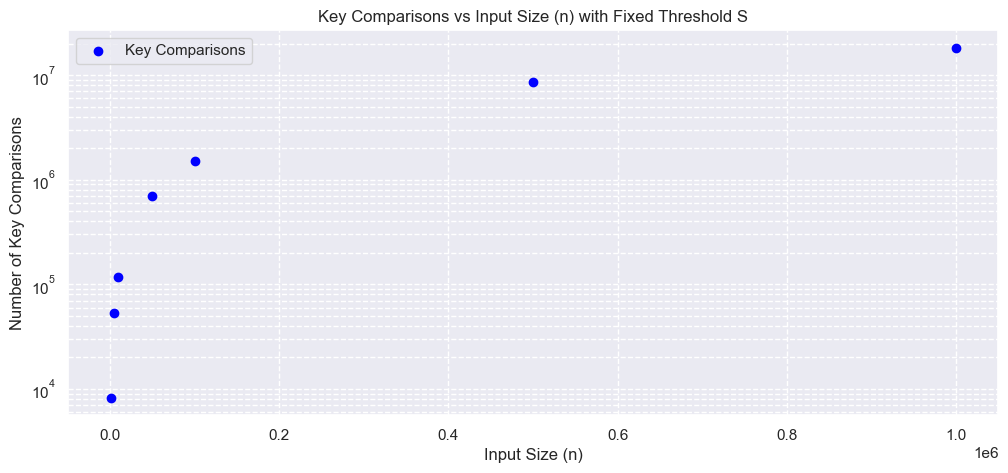

In [63]:
S = 4

sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]

comparisons_by_size = []

for size in sizes:
    data = generate_data(size, size)
    comparison_count = 0
    Hybrid_Merge_Sort(data, S)
    comparisons_by_size.append(comparison_count)
    print(f"Input size: {size}, Key comparisons: {comparison_count}")


# Create a scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(sizes, comparisons_by_size, color='blue', label='Key Comparisons')

# Set plot labels and title
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Key Comparisons')
plt.title('Key Comparisons vs Input Size (n) with Fixed Threshold S')

# Optional: Use a logarithmic scale for better visualization of large differences
plt.yscale('log')  # Apply log scale on y-axis if the range of values is large

# Add grid and legend
plt.grid(True, which="both", ls="--")
plt.legend()

# Show the plot
plt.show()

# **With the input size n fixed, plot the number of key comparisons over different values of S**

Threshold S: 1, Key Comparisons: 120445
Threshold S: 2, Key Comparisons: 118476
Threshold S: 3, Key Comparisons: 117127
Threshold S: 4, Key Comparisons: 117118
Threshold S: 5, Key Comparisons: 116017
Threshold S: 6, Key Comparisons: 116126
Threshold S: 7, Key Comparisons: 115929
Threshold S: 8, Key Comparisons: 116048
Threshold S: 9, Key Comparisons: 116626
Threshold S: 10, Key Comparisons: 119958
Threshold S: 11, Key Comparisons: 120142
Threshold S: 12, Key Comparisons: 120162
Threshold S: 13, Key Comparisons: 120086
Threshold S: 14, Key Comparisons: 120115
Threshold S: 15, Key Comparisons: 119950
Threshold S: 16, Key Comparisons: 119878
Threshold S: 17, Key Comparisons: 120179
Threshold S: 18, Key Comparisons: 119976
Threshold S: 19, Key Comparisons: 126480
Threshold S: 20, Key Comparisons: 134626
Threshold S: 21, Key Comparisons: 135646
Threshold S: 22, Key Comparisons: 135477
Threshold S: 23, Key Comparisons: 135500
Threshold S: 24, Key Comparisons: 136219
Threshold S: 25, Key Comp

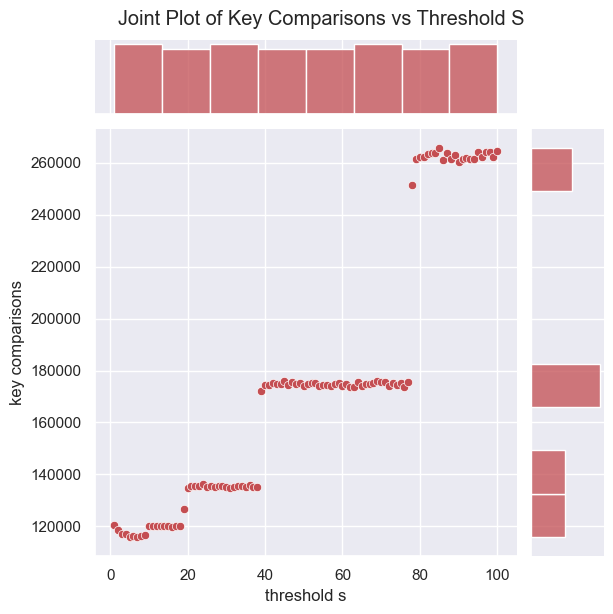

In [65]:
fixed_size = 10000
threshold_values = list(range(1, 101))

comparisons_by_threshold = []

# Loop through thresholds
for s in threshold_values:
    data = generate_data(fixed_size, fixed_size)
    comparison_count = 0  # Reset comparison count
    Hybrid_Merge_Sort(data, s)
    comparisons_by_threshold.append(comparison_count)
    print(f"Threshold S: {s}, Key Comparisons: {comparison_count}")

# Create DataFrame for plotting
df = pd.DataFrame({
    'threshold s': threshold_values,
    'key comparisons': comparisons_by_threshold
})

# Create joint plot
sb.jointplot(data=df, x='threshold s', y='key comparisons', kind='scatter', color='r')

# Add title
plt.suptitle('Joint Plot of Key Comparisons vs Threshold S', y=1.02)

# Show plot
plt.show()

In [10]:
# Define input sizes and threshold values
input_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
threshold_values = list(range(1, 101))

# Store the optimal S values for each input size
optimal_S_values = []

for size in input_sizes:
    comparisons_for_S = []
    data = generate_data(size, size)  # Generate the data once for each input size

    for S in threshold_values:
        comparison_count = 0  # Reset comparison count
        Hybrid_Merge_Sort(data, S)  # Run the hybrid sort
        comparisons_for_S.append(comparison_count)

    # Find the optimal S (the one with the fewest comparisons)
    optimal_S = threshold_values[comparisons_for_S.index(min(comparisons_for_S))]
    optimal_S_values.append(optimal_S)
    print(f"Input size: {size}, Optimal S: {optimal_S}")

# Plot the optimal S for each input size
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, optimal_S_values, marker='o', linestyle='-', color='g')
plt.title('Optimal Threshold S vs Input Size (n)')
plt.xlabel('Input Size (n)')
plt.ylabel('Optimal Threshold S')
plt.grid(True)
plt.show()

In [11]:
n = 10000000
data_original = generate_data(n, n)
data_hybrid = data_original.copy()

comparison_count = 0
start_time = time.time()
Merge_Sort_Split_Func(data_original)
original_mergesort_time = time.time() - start_time
original_comparisons = comparison_count

print(f"Original Mergesort: {original_comparisons} comparisons, {original_mergesort_time:.2f} seconds")

for s in optimal_S_values:
    comparison_count = 0
    start_time = time.time()
    Hybrid_Merge_Sort(data_hybrid, s)
    hybrid_mergesort_time = time.time() - start_time
    hybrid_comparisons = comparison_count

    print(f"Hybrid Mergesort (S={s}): {hybrid_comparisons} comparisons, {hybrid_mergesort_time:.2f} seconds \n")



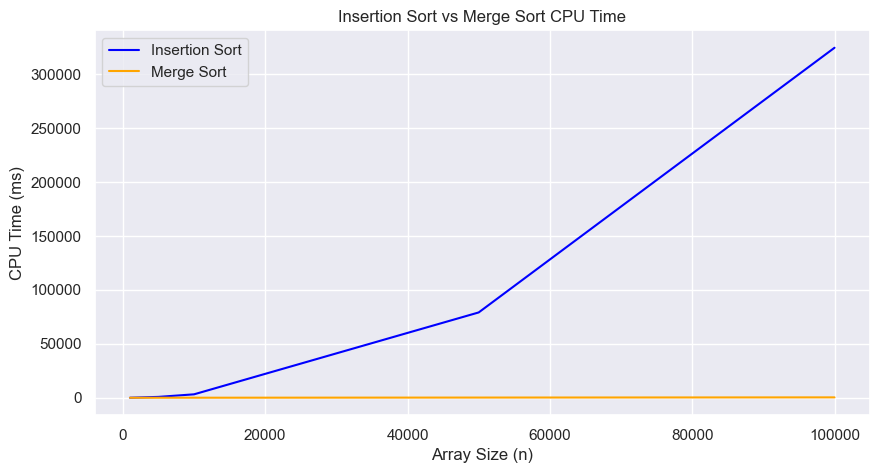

In [13]:
# Define input sizes and threshold values
input_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
threshold_values = list(range(1, 101))

# Store the optimal S values for each input size
optimal_S_values = []

for size in input_sizes:
    comparisons_for_S = []
    data = generate_data(size, size)  # Generate the data once for each input size

    for S in threshold_values:
        comparison_count = 0  # Reset comparison count
        Hybrid_Merge_Sort(data.copy(), S)  # Run the hybrid sort
        comparisons_for_S.append(comparison_count)

    # Find the optimal S (the one with the fewest comparisons)
    optimal_S = threshold_values[comparisons_for_S.index(min(comparisons_for_S))]
    optimal_S_values.append(optimal_S)
    print(f"Input size: {size}, Optimal S: {optimal_S}")

# Plot the optimal S for each input size
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, optimal_S_values, marker='o', linestyle='-', color='g')
plt.title('Optimal Threshold S vs Input Size (n)')
plt.xlabel('Input Size (n)')
plt.ylabel('Optimal Threshold S')
plt.grid(True)
plt.show()


data = np.array(optimal_S_values).reshape(len(input_sizes), 1)
sb.heatmap(data, annot=True, cmap='Greens', xticklabels=['Optimal S'], yticklabels=input_sizes)
plt.title('Heatmap of Optimal Threshold S for Different Input Sizes')
plt.show()

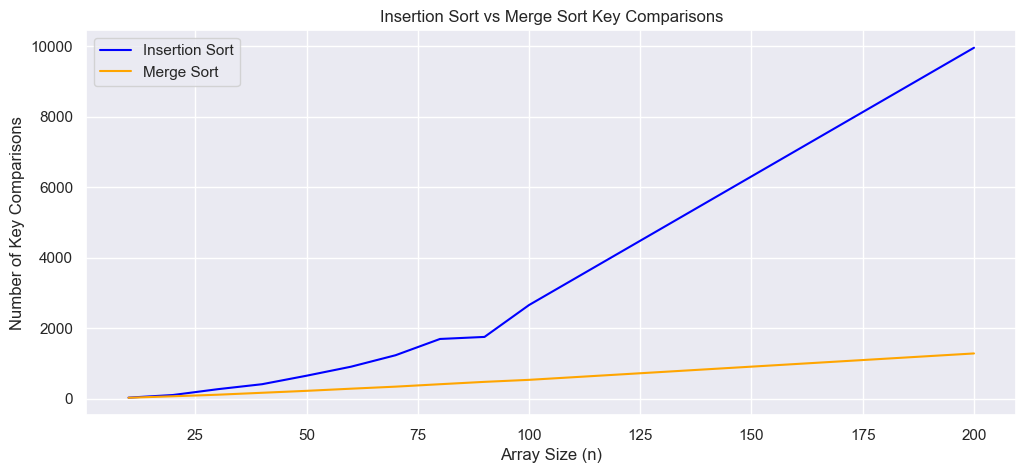

In [46]:
# Function to run the sorting and track the number of key comparisons
def track_key_comparisons(sorting_func, array):
    global comparison_count
    comparison_count = 0  # Reset comparison count
    sorting_func(array.copy())  # Use a copy to avoid modifying the original array
    return comparison_count  # Return the number of key comparisons

# Define array sizes for testing
sizes = [10, 20, 30,40,50,60,70,80,90,100,200]

# Store the number of key comparisons for each sort
merge_sort_comparisons = []
insertion_sort_comparisons = []

# Run the tests for each array size
for size in sizes:
    # Generate random data using a data generator function
    random_array = generate_data(size,size)
    
    # Track key comparisons for merge sort
    merge_comparison_count = track_key_comparisons(Merge_Sort_Split_Func, random_array)
    merge_sort_comparisons.append(merge_comparison_count)
    
    # Track key comparisons for insertion sort
    insertion_comparison_count = track_key_comparisons(Insertion_Sort, random_array)
    insertion_sort_comparisons.append(insertion_comparison_count)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(sizes, insertion_sort_comparisons, label='Insertion Sort', color='blue')
plt.plot(sizes, merge_sort_comparisons, label='Merge Sort', color='orange')
plt.xlabel('Array Size (n)')
plt.ylabel('Number of Key Comparisons')
plt.title('Insertion Sort vs Merge Sort Key Comparisons')
plt.legend()
plt.grid(True)
plt.show()

# Assuming `sizes`, `insertion_sort_comparisons`, and `merge_sort_comparisons` are already defined

# Define the bar width
bar_width = 0.35

# Define the positions of the bars on the x-axis
bar_positions = np.arange(len(sizes))

# Create the bar graph
plt.figure(figsize=(12, 5))

# Insertion Sort bars (shifted left by bar_width / 2 for separation)
plt.bar(bar_positions - bar_width / 2, insertion_sort_comparisons, bar_width, label='Insertion Sort', color='blue')

# Merge Sort bars (shifted right by bar_width / 2 for separation)
plt.bar(bar_positions + bar_width / 2, merge_sort_comparisons, bar_width, label='Merge Sort', color='orange')

# Add labels and title
plt.xlabel('Array Size (n)')
plt.ylabel('Number of Key Comparisons')
plt.title('Insertion Sort vs Merge Sort Key Comparisons')

# Add xticks for array sizes
plt.xticks(bar_positions, sizes)

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
# Function to time the execution of a function
def time_sorting_function(sorting_func, array):
    start_time = time.time()
    sorting_func(array.copy())  # Use a copy to avoid modifying the original
    end_time = time.time()
    return (end_time - start_time) * 1000  # Return time in milliseconds

# Prepare arrays of different sizes and store time taken by each sorting method
sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
merge_sort_times = []
insertion_sort_times = []


for size in sizes:
    # Generate random data using the provided data generator function
    random_array = generate_data(size, size)

    comparison_count = 0
    # Time the merge sort
    merge_sort_time = time_sorting_function(Merge_Sort_Split_Func, random_array)
    merge_sort_times.append(merge_sort_time)

    comparison_count = 0
    # Time the insertion sort
    insertion_sort_time = time_sorting_function(Insertion_Sort, random_array)
    insertion_sort_times.append(insertion_sort_time)

# Plot the results with a logarithmic scale
plt.figure(figsize=(12, 5))
plt.plot(sizes, insertion_sort_times, label='Insertion Sort', color='blue')
plt.plot(sizes, merge_sort_times, label='Merge Sort', color='orange')
plt.xlabel('Array Size (n)')
plt.ylabel('CPU Time (ms) [Log Scale]')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Insertion Sort vs Merge Sort CPU Time (Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Insertion Sort on the primary y-axis
ax1.plot(sizes, insertion_sort_times, label='Insertion Sort', color='blue')
ax1.set_xlabel('Array Size (n)')
ax1.set_ylabel('Insertion Sort CPU Time (ms)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create another y-axis for Merge Sort
ax2 = ax1.twinx()  
ax2.plot(sizes, merge_sort_times, label='Merge Sort', color='orange')
ax2.set_ylabel('Merge Sort CPU Time (ms)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Insertion Sort vs Merge Sort CPU Time')
fig.tight_layout()  # Ensure the layout fits well
plt.grid(True)
plt.show()



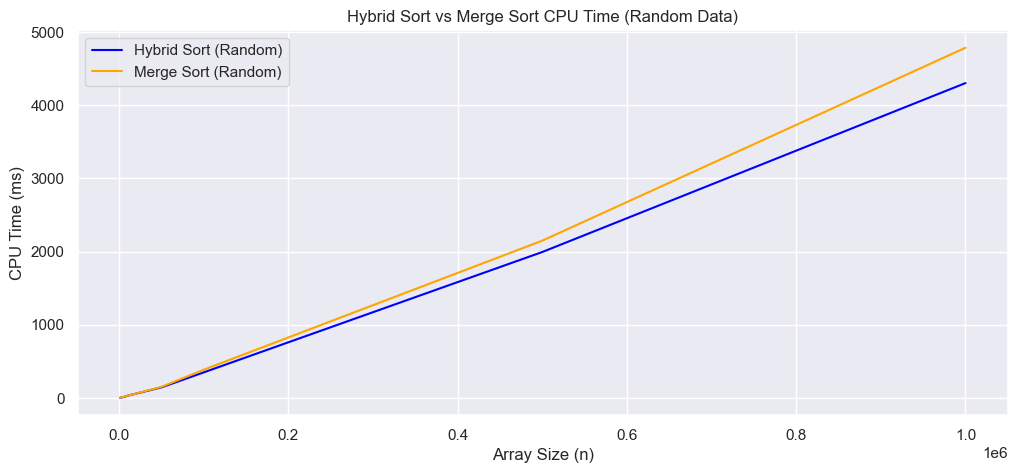

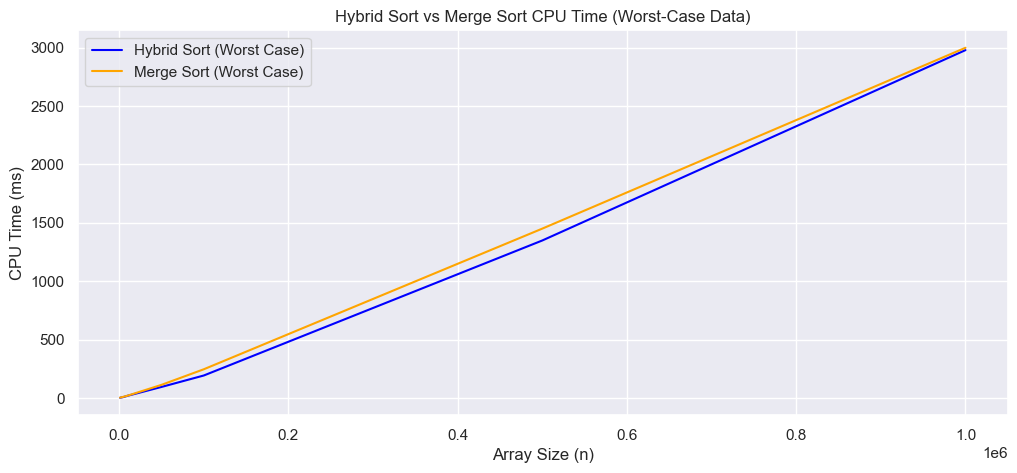

In [66]:
# Define array sizes for testing
sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]

# Store the times for merge sort and hybrid sort on random and worst-case data
merge_sort_times_random = []
hybrid_sort_times_random = []
merge_sort_times_worst = []
hybrid_sort_times_worst = []

# Run the tests for each array size
for size in sizes:
    # Generate random data and worst-case data
    random_array = generate_random_data(size, size)
    worst_case_array = generate_worst_case_data(size, size)
    
    # Time the merge sort on random data
    merge_sort_time_random = time_sorting_function(Merge_Sort_Split_Func, random_array)
    merge_sort_times_random.append(merge_sort_time_random)
    
    # Time the hybrid sort on random data
    hybrid_sort_time_random = hybrid_time_sorting_function(Hybrid_Merge_Sort, random_array, 5)
    hybrid_sort_times_random.append(hybrid_sort_time_random)
    
    # Time the merge sort on worst-case data
    merge_sort_time_worst = time_sorting_function(Merge_Sort_Split_Func, worst_case_array)
    merge_sort_times_worst.append(merge_sort_time_worst)
    
    # Time the hybrid sort on worst-case data
    hybrid_sort_time_worst = hybrid_time_sorting_function(Hybrid_Merge_Sort, worst_case_array, 5)
    hybrid_sort_times_worst.append(hybrid_sort_time_worst)

# Plot the results for Random Data
plt.figure(figsize=(12, 5))
plt.plot(sizes, hybrid_sort_times_random, label='Hybrid Sort (Random)', color='blue')
plt.plot(sizes, merge_sort_times_random, label='Merge Sort (Random)', color='orange')
plt.xlabel('Array Size (n)')
plt.ylabel('CPU Time (ms)')
plt.title('Hybrid Sort vs Merge Sort CPU Time (Random Data)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results for Worst-Case Data
plt.figure(figsize=(12, 5))
plt.plot(sizes, hybrid_sort_times_worst, label='Hybrid Sort (Worst Case)', color='blue')
plt.plot(sizes, merge_sort_times_worst, label='Merge Sort (Worst Case)', color='orange')
plt.xlabel('Array Size (n)')
plt.ylabel('CPU Time (ms)')
plt.title('Hybrid Sort vs Merge Sort CPU Time (Worst-Case Data)')
plt.legend()
plt.grid(True)
plt.show()


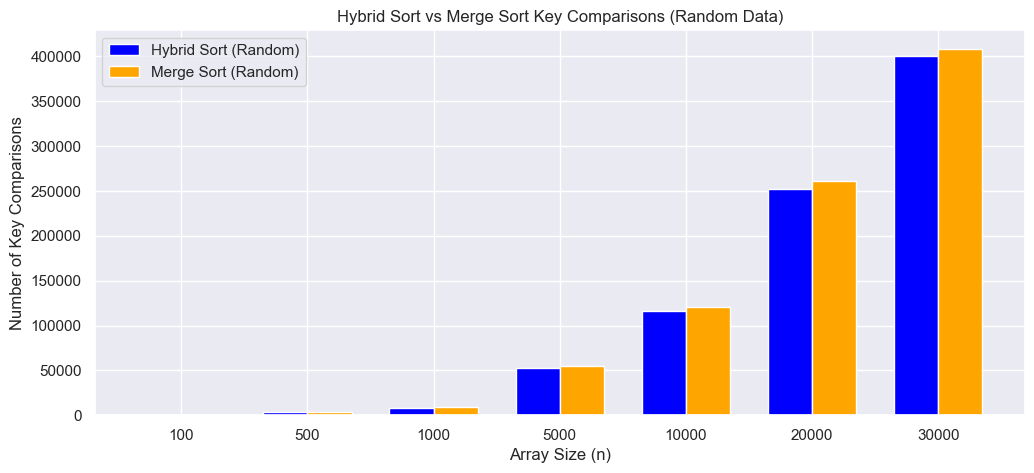

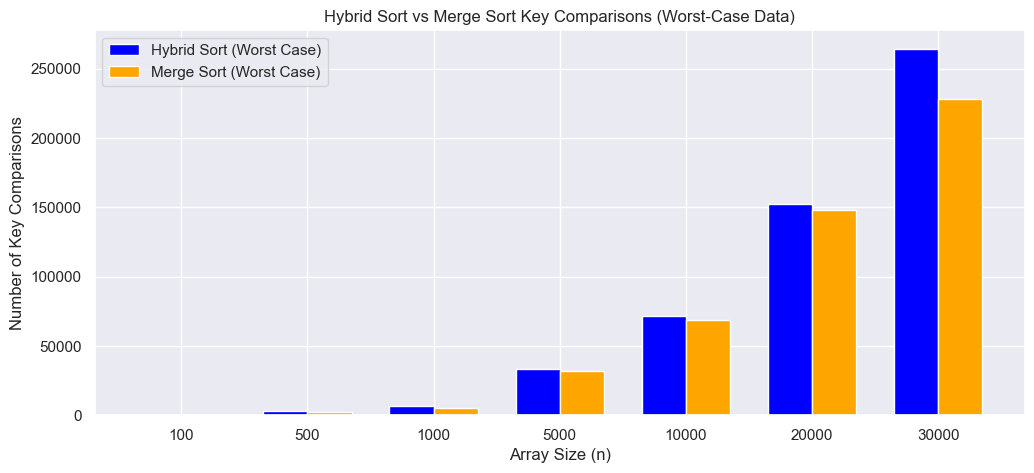

In [31]:
# Define array sizes (reduced for better comparison)
sizes = [100, 500, 1000, 5000, 10000, 20000, 30000]

# Store the comparisons for merge sort and hybrid sort on random and worst-case data
merge_sort_comparisons_random = []
hybrid_sort_comparisons_random = []
merge_sort_comparisons_worst = []
hybrid_sort_comparisons_worst = []

# Run the tests for each array size
for size in sizes:
    # Generate random data and worst-case data
    random_array = generate_random_data(size, size)
    worst_case_array = generate_worst_case_data(size, size)

    # Reset the comparison counter for merge sort (random data)
    comparison_count = 0
    Merge_Sort_Split_Func(random_array.copy())
    merge_sort_comparisons_random.append(comparison_count)

    # Reset the comparison counter for hybrid sort (random data)
    comparison_count = 0
    Hybrid_Merge_Sort(random_array.copy(), 5)
    hybrid_sort_comparisons_random.append(comparison_count)

    # Reset the comparison counter for merge sort (worst-case data)
    comparison_count = 0
    Merge_Sort_Split_Func(worst_case_array.copy())
    merge_sort_comparisons_worst.append(comparison_count)

    # Reset the comparison counter for hybrid sort (worst-case data)
    comparison_count = 0
    Hybrid_Merge_Sort(worst_case_array.copy(), 5)
    hybrid_sort_comparisons_worst.append(comparison_count)

# Bar width
bar_width = 0.35

# Set positions of bars on x-axis
bar_positions = np.arange(len(sizes))

# Plot bar graph for Random Data (Key Comparisons)
plt.figure(figsize=(12, 5))
plt.bar(bar_positions - bar_width / 2, hybrid_sort_comparisons_random, bar_width, label='Hybrid Sort (Random)', color='blue')
plt.bar(bar_positions + bar_width / 2, merge_sort_comparisons_random, bar_width, label='Merge Sort (Random)', color='orange')
plt.xticks(bar_positions, sizes)
plt.xlabel('Array Size (n)')
plt.ylabel('Number of Key Comparisons')
plt.title('Hybrid Sort vs Merge Sort Key Comparisons (Random Data)')
plt.legend()
plt.grid(True)
plt.show()

# Plot bar graph for Worst-Case Data (Key Comparisons)
plt.figure(figsize=(12, 5))
plt.bar(bar_positions - bar_width / 2, hybrid_sort_comparisons_worst, bar_width, label='Hybrid Sort (Worst Case)', color='blue')
plt.bar(bar_positions + bar_width / 2, merge_sort_comparisons_worst, bar_width, label='Merge Sort (Worst Case)', color='orange')
plt.xticks(bar_positions, sizes)
plt.xlabel('Array Size (n)')
plt.ylabel('Number of Key Comparisons')
plt.title('Hybrid Sort vs Merge Sort Key Comparisons (Worst-Case Data)')
plt.legend()
plt.grid(True)
plt.show()